# **Project Name**    - **Mortgage-Prepayment-Analysis-and-Prediction**

##**Project Aim** - To predict the mortgage backed securities prepayment risk using machine learning models.


### Import Libraries

In [1]:
# Importing required Libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data splitting
from sklearn.model_selection import train_test_split

# Classification algorithms
from sklearn.linear_model import LogisticRegression

# Model evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the dataset to be analysed
data = pd.read_csv('/content/drive/MyDrive/LoanExport.csv',low_memory=False)

### Dataset First View

In [5]:
# Shows first 5 rows
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [6]:
# Shows last 5 rows
data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


### Dataset Rows & Columns Count

In [7]:
# Dataset Rows & Columns count
data.shape

(291451, 28)

### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(data.isnull().sum())

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


<Axes: >

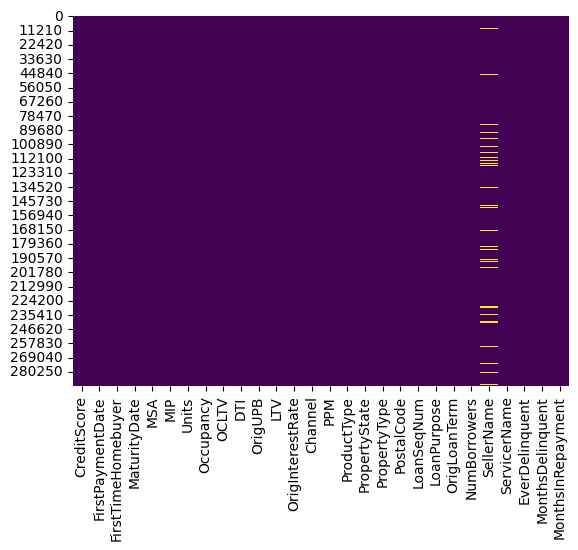

In [10]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

## Understanding  Variables

In [12]:
# Dataset Columns
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [13]:
# Dataset Describe
data.describe(include='all')

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,...,892,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,...,3776,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


### Variables Description

1. **CreditScore**: Credit score of the client.
2. **FirstPaymentDate**: The date when the borrower made their first payment on the loan.
3. **FirstTimeHomebuyer**: Indicates whether the borrower is a first-time homebuyer.
4. **MaturityDate**: The maturity date of the mortgage.
5. **MSA**: Metropolitan Statistical Area code.
6. **MIP**: Mortgage Insurance Premium.
7. **Units**: The number of units in the property.
8. **Occupancy**: Indicates whether the property is owner-occupied, an investment property, or a second home.
9. **OCLTV**: Original Combined Loan-to-Value ratio.
10. **DTI**: Debt-to-Income ratio
11. **OrigUPB**: Original Unpaid Principal Balance.
12. **LTV**: Loan-to-Value ratio. The ratio of the loan amount to the appraised value of the property.
13. **OrigInterestRate**: The original interest rate of the mortgage.
14. **Channel**: The origination channel of the loan, such as retail, broker, correspondent, etc.
15. **PPM**: Prepayment Penalty Mortgage. Indicates whether the loan has a prepayment penalty (Y/N).
16. **ProductType**: The type of mortgage product, such as Fixed-Rate Mortgage (FRM) or Adjustable-Rate Mortgage (ARM).
17. **PropertyState**: The state in which the property is located
18. **PropertyType**: The type of property securing the mortgage
19. **PostalCode**: The postal code of the property.
20. **LoanSeqNum**: A unique identifier for the loan, typically used for tracking and reference purposes.
21. **LoanPurpose**: The purpose of the loan, such as purchase, refinance, or home improvement.
22. **OrigLoanTerm**: The original term of the loan in months (e.g., 360 months for a 30-year mortgage).
23. **NumBorrowers**: The number of borrowers on the loan.
24. **SellerName**: The name of the entity that sold the mortgage to the investor or the secondary market.
25. **ServicerName**: The name of the entity responsible for collecting payments and managing the loan on behalf of the investor.
26. **EverDelinquent**: Indicates whether the borrower has ever been delinquent (late) on the loan payments (0 = No, 1 = Yes).
27. **MonthsDelinquent**: The number of months the borrower has been delinquent.
28. **MonthsInRepayment**: The number of months the borrower has been making payments on the loan.

## Data Cleaning

####Since there is a large number of missing values in the ‘SellerName’ column, we will drop this column.

In [14]:
# Drop the 'SellerName' column
data.drop(columns=['SellerName'], inplace=True)

In [15]:
# Checking for null values again to reassure data integrity
data.isnull().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


## Changing data type of column

In [16]:
# Convert 'FirstPaymentDate' and 'MaturityDate' to datetime format
data['FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format='%Y%m')
data['MaturityDate'] = pd.to_datetime(data['MaturityDate'], format='%Y%m')

In [17]:
# Extract year and month from 'FirstPaymentDate' and 'MaturityDate'
data['FirstPaymentYear'] = data['FirstPaymentDate'].dt.year
data['FirstPaymentMonth'] = data['FirstPaymentDate'].dt.month
data['MaturityYear'] = data['MaturityDate'].dt.year
data['MaturityMonth'] = data['MaturityDate'].dt.month

####We will drop 'FirstPaymentDate' and 'MaturityDate' columns as they've been transformed into numerical features.

In [18]:
data.drop(columns=['FirstPaymentDate', 'MaturityDate'], inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstTimeHomebuyer  291451 non-null  object 
 2   MSA                 291451 non-null  object 
 3   MIP                 291451 non-null  int64  
 4   Units               291451 non-null  int64  
 5   Occupancy           291451 non-null  object 
 6   OCLTV               291451 non-null  int64  
 7   DTI                 291451 non-null  int64  
 8   OrigUPB             291451 non-null  int64  
 9   LTV                 291451 non-null  int64  
 10  OrigInterestRate    291451 non-null  float64
 11  Channel             291451 non-null  object 
 12  PPM                 291451 non-null  object 
 13  ProductType         291451 non-null  object 
 14  PropertyState       291451 non-null  object 
 15  PropertyType        291451 non-nul

####There are some columns that contain 'X', so we will drop the rows with such values.

In [20]:
# Identify rows with 'X' or variations
rows_to_drop = data[data.select_dtypes(include='object').apply(lambda x: x.str.strip() == 'X').any(axis=1)].index

# Drop these rows
df_cleaned = data.drop(index=rows_to_drop)

# Check the shape of the cleaned dataframe
df_cleaned.shape


(181663, 29)

In [21]:
df_cleaned.head(10)

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
0,0,N,16974,25,1,O,89,27,117000,89,...,360,2,WASHINGTONMUTUALBANK,0,0,52,1999,2,2029,1
1,0,N,19740,0,1,O,73,17,109000,73,...,360,1,CHASEHOMEFINANCELLC,0,0,144,1999,2,2029,1
2,0,N,29940,0,1,O,75,16,88000,75,...,360,2,WASHINGTONMUTUALBANK,0,0,67,1999,2,2029,1
3,0,N,31084,0,1,O,76,14,160000,76,...,360,2,GMACMTGECORP,0,0,35,1999,2,2029,1
4,0,N,35644,0,1,O,78,18,109000,78,...,360,2,GMACMTGECORP,0,0,54,1999,2,2029,1
9,0,Y,48620,30,1,O,95,27,35000,95,...,360,1,WELLSFARGOBANKNA,1,104,212,1999,2,2029,1
10,0,N,12060,0,1,O,80,19,126000,80,...,360,2,Other servicers,0,0,37,1999,3,2029,2
11,0,N,12060,12,1,O,77,18,200000,77,...,360,1,ABNAMROMTGEGROUPINC,0,0,47,1999,3,2029,2
12,0,N,12060,12,1,O,85,38,70000,85,...,360,1,BANKOFAMERICANA,0,0,53,1999,3,2029,2
13,0,N,12060,25,1,O,90,19,93000,90,...,360,2,BANKOFAMERICANA,0,0,55,1999,3,2029,2


## Data Encoding

####We will convert categorical variables into numerical values through encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [23]:
# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [24]:
df_cleaned.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
0,0,0,68,25,1,1,89,27,117000,89,...,360,1,17,0,0,52,1999,2,2029,1
1,0,0,95,0,1,1,73,17,109000,73,...,360,0,3,0,0,144,1999,2,2029,1
2,0,0,198,0,1,1,75,16,88000,75,...,360,1,17,0,0,67,1999,2,2029,1
3,0,0,210,0,1,1,76,14,160000,76,...,360,1,10,0,0,35,1999,2,2029,1
4,0,0,250,0,1,1,78,18,109000,78,...,360,1,10,0,0,54,1999,2,2029,1


In [25]:
# Check that all data is now numeric
df_cleaned.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('int32')], dtype=object)

## Data Splitting

In [26]:
df_cleaned['EverDelinquent'].value_counts()

,count
EverDelinquent,
0,146961
1,34702


In [27]:
x=df_cleaned.drop('EverDelinquent',axis=1)
y=df_cleaned['EverDelinquent']

In [28]:
# Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y, shuffle=True)

In [29]:
y_train.value_counts()

,count
EverDelinquent,
0,117568
1,27762


In [30]:
y_test.value_counts()

,count
EverDelinquent,
0,29393
1,6940


## ML Model Implementation

In [31]:
# ML model function to calculate scores
def model_scores(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train) # fitting the model

  y_pred_tr=model.predict(x_train) # predicted train labels
  y_pred_tst=model.predict(x_test) # predicted test labels

  try:
    y_prob_tr=model.predict_proba(x_train)[:,1] # probability values for train
    y_prob_tst=model.predict_proba(x_test)[:,1] # probability values for test
  except:
    pass

  # Plotting confusion matrix for train and test data.
  cm_train=confusion_matrix(y_train,y_pred_tr)
  cm_test=confusion_matrix(y_test,y_pred_tst)

  fig,ax=plt.subplots(1,2,figsize=(10,5))

  # Confusion matrix for train data
  sns.heatmap(cm_train,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[0],fmt='.0f')
  ax[0].set_xlabel("Predicted labels")
  ax[0].set_ylabel("True labels")
  ax[0].set_title("Confusion matrix for Train Data")

  # Confusion matrix for test data
  sns.heatmap(cm_test,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[1],fmt='.0f')
  ax[1].set_xlabel("Predicted labels")
  ax[1].set_ylabel("True labels")
  ax[1].set_title("Confusion matrix for Test Data")
  plt.show()

  # Classification report
  target_names=[0,1]
  clr_tr=classification_report(y_train,y_pred_tr,target_names=target_names,output_dict=True)
  clr_tst=classification_report(y_test,y_pred_tst,target_names=target_names,output_dict=True)
  clr_tr_df=pd.DataFrame(clr_tr).T
  clr_tst_df=pd.DataFrame(clr_tst).T
  print("\n\nThe classification report for train data is:\n\n",clr_tr_df)
  print("\n\nThe classification report for test data is:\n\n",clr_tst_df)

  # Calculating all scores and storing it in a list
  precision_train=clr_tr['macro avg']['precision']
  precision_tst=clr_tst['macro avg']['precision']

  recall_tr=clr_tr[1]['recall']
  recall_tst=clr_tst[1]['recall']

  acc_tr=accuracy_score(y_train,y_pred_tr)
  acc_tst=accuracy_score(y_test,y_pred_tst)

  f1_tr=clr_tr['macro avg']['f1-score']
  f1_tst=clr_tst['macro avg']['f1-score']

  model_metric=[precision_train,precision_tst,recall_tr,recall_tst,acc_tr,acc_tst,f1_tr,f1_tst]

  return model_metric

In [32]:
# Plotting feature importance

def feature_importances(model,names,model_name):
  importances=np.array(model.feature_importances_)
  feature_names=np.array(names)
  data={'feature_names':feature_names,'feature_importances':importances}
  fi_df=pd.DataFrame(df_cleaned)
  fi_df.sort_values(by=['feature_importances'],ascending=False,inplace=True)
  sns.barplot(y=fi_df['feature_names'],x=fi_df['feature_importances'])
  plt.title(model_name + ' feature importance')
  plt.xlabel("Feature importances")
  plt.ylabel("Feature names")

## 1. Logistic Regression

In [33]:
# ML Model 1 - Implementation
log_reg=LogisticRegression(fit_intercept=True,max_iter=1000)

In [34]:
# Defining dataframe to store ml models performance metrics
model_df=pd.DataFrame(index=['precision_train','precision_test','recall_train','recall_test','accuracy_train','accuracy_test','f1_train','f1_test'])

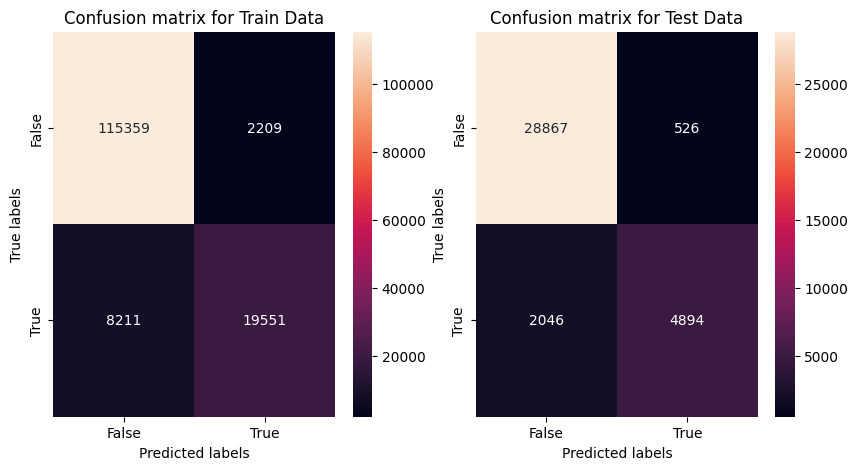



The classification report for train data is:

               precision    recall  f1-score        support
0              0.933552  0.981211  0.956788  117568.000000
1              0.898483  0.704236  0.789588   27762.000000
accuracy       0.928301  0.928301  0.928301       0.928301
macro avg      0.916018  0.842723  0.873188  145330.000000
weighted avg   0.926853  0.928301  0.924849  145330.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.933814  0.982105  0.957351  29393.00000
1              0.902952  0.705187  0.791909   6940.00000
accuracy       0.929210  0.929210  0.929210      0.92921
macro avg      0.918383  0.843646  0.874630  36333.00000
weighted avg   0.927919  0.929210  0.925750  36333.00000


In [35]:
# Visualizing evaluation metric score chart
log_scores=model_scores(log_reg,x_train,x_test,y_train,y_test)

In [36]:
model_df['Logistic Regression'] = log_scores
model_df

,Logistic Regression
precision_train,0.916018
precision_test,0.918383
recall_train,0.704236
recall_test,0.705187
accuracy_train,0.928301
accuracy_test,0.929210
f1_train,0.873188
f1_test,0.874630


#### For logistic regression, the accuracy test score is 0.92. The model is performing really well.

## 2. KNN (K-Nearest Neighbor)


In [37]:
# ML Model 2 - Implementation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

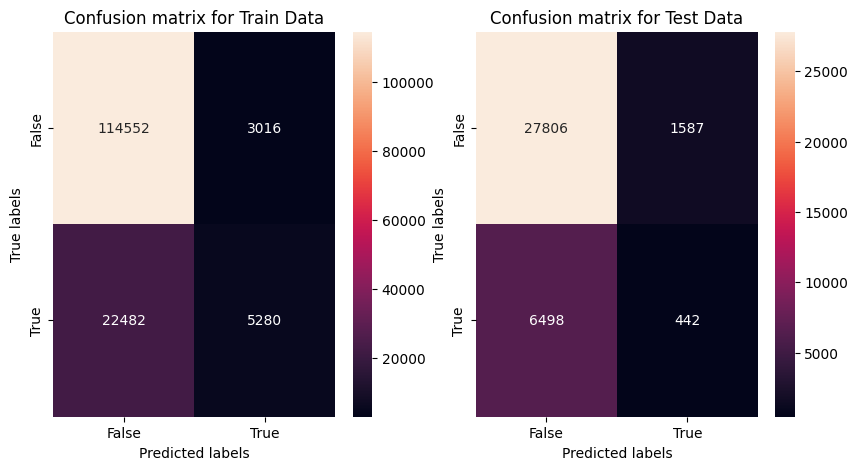



The classification report for train data is:

               precision    recall  f1-score        support
0              0.835939  0.974347  0.899852  117568.000000
1              0.636451  0.190188  0.292862   27762.000000
accuracy       0.824551  0.824551  0.824551       0.824551
macro avg      0.736195  0.582267  0.596357  145330.000000
weighted avg   0.797831  0.824551  0.783900  145330.000000


The classification report for test data is:

               precision    recall  f1-score       support
0              0.810576  0.946008  0.873071  29393.000000
1              0.217841  0.063689  0.098562   6940.000000
accuracy       0.777475  0.777475  0.777475      0.777475
macro avg      0.514209  0.504848  0.485816  36333.000000
weighted avg   0.697357  0.777475  0.725131  36333.000000


In [38]:
# Visualizing evaluation metric score chart
knn_scores=model_scores(knn,x_train,x_test,y_train,y_test)

In [39]:
# Evaluation metric score chart
model_df['KNearestNeighbors']=knn_scores
model_df

,Logistic Regression,KNearestNeighbors
precision_train,0.916018,0.736195
precision_test,0.918383,0.514209
recall_train,0.704236,0.190188
recall_test,0.705187,0.063689
accuracy_train,0.928301,0.824551
accuracy_test,0.929210,0.777475
f1_train,0.873188,0.596357
f1_test,0.874630,0.485816


#### This model does not seem to perform as well as logistic regression.

## 3. Naive Bayes

In [40]:
# ML Model 3 - Implementation
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

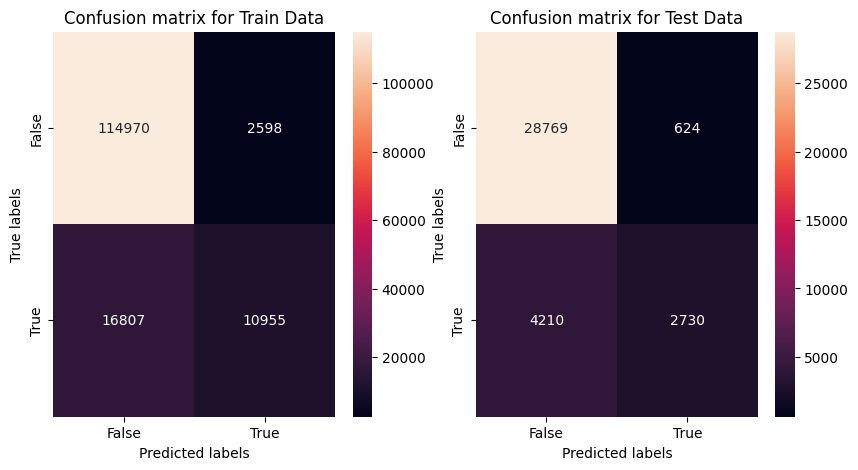



The classification report for train data is:

               precision    recall  f1-score        support
0              0.872459  0.977902  0.922176  117568.000000
1              0.808308  0.394604  0.530316   27762.000000
accuracy       0.866476  0.866476  0.866476       0.866476
macro avg      0.840383  0.686253  0.726246  145330.000000
weighted avg   0.860204  0.866476  0.847320  145330.000000


The classification report for test data is:

               precision    recall  f1-score       support
0              0.872343  0.978770  0.922497  29393.000000
1              0.813953  0.393372  0.530406   6940.000000
accuracy       0.866953  0.866953  0.866953      0.866953
macro avg      0.843148  0.686071  0.726452  36333.000000
weighted avg   0.861190  0.866953  0.847604  36333.000000


In [41]:
# Visualizing evaluation metric score chart
nb_model=model_scores(nb,x_train,x_test,y_train,y_test)

In [42]:
model_df['Naive Bayes']=nb_model
model_df

,Logistic Regression,KNearestNeighbors,Naive Bayes
precision_train,0.916018,0.736195,0.840383
precision_test,0.918383,0.514209,0.843148
recall_train,0.704236,0.190188,0.394604
recall_test,0.705187,0.063689,0.393372
accuracy_train,0.928301,0.824551,0.866476
accuracy_test,0.929210,0.777475,0.866953
f1_train,0.873188,0.596357,0.726246
f1_test,0.874630,0.485816,0.726452


#### This model's performance is better than KNN but not as good as logistic regression.

# Conclusion

###Best Performing Model: Logistic Regression

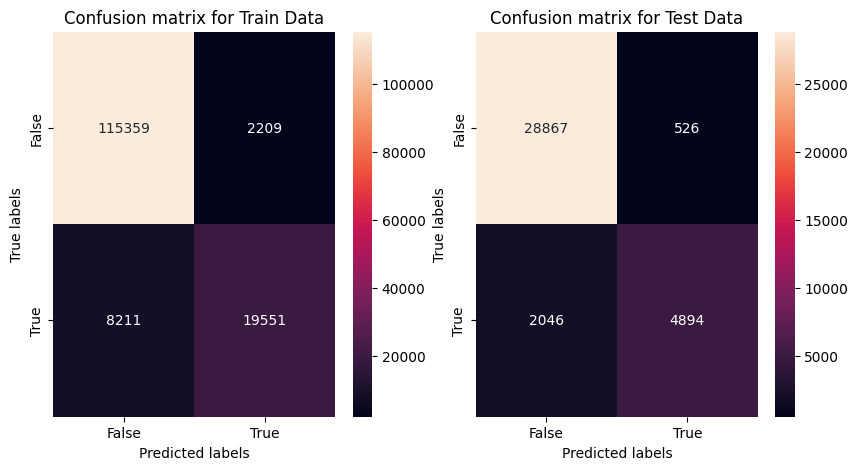



The classification report for train data is:

               precision    recall  f1-score        support
0              0.933552  0.981211  0.956788  117568.000000
1              0.898483  0.704236  0.789588   27762.000000
accuracy       0.928301  0.928301  0.928301       0.928301
macro avg      0.916018  0.842723  0.873188  145330.000000
weighted avg   0.926853  0.928301  0.924849  145330.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.933814  0.982105  0.957351  29393.00000
1              0.902952  0.705187  0.791909   6940.00000
accuracy       0.929210  0.929210  0.929210      0.92921
macro avg      0.918383  0.843646  0.874630  36333.00000
weighted avg   0.927919  0.929210  0.925750  36333.00000


In [43]:
# Visualizing evaluation metric score chart
log_scores=model_scores(log_reg,x_train,x_test,y_train,y_test)

####**For Training Data:**

* ##### Accuracy (92.83%): The model correctly predicts the prepayment risk in approximately 93% of cases on the training data, demonstrating strong overall performance.

* ##### Precision (Class 0: 93.36%, Class 1: 89.85%): The model is effective at correctly identifying non-delinquent cases and is also reliable in detecting delinquent cases, minimizing false positives for both classes.

* ##### Recall (Class 0: 98.12%, Class 1: 70.42%): The model has high recall for non-delinquent cases, successfully identifying nearly all such instances. For delinquent cases, recall is good but indicates some missed cases.

####**For Testing Data:**

* ##### Accuracy (92.92%): The model achieves similar high accuracy on the test data, reflecting its robust performance on unseen data.

* ##### Precision (Class 0: 93.38%, Class 1: 90.30%): Precision remains strong for both classes, showing that the model accurately identifies cases of both types.

* ##### Recall (Class 0: 98.21%, Class 1: 70.51%): Recall for non-delinquent cases is slightly higher on the test data, while recall for delinquent cases is consistent, indicating effective detection with minimal missed cases.
